In [2]:
import praw
from praw.models import MoreComments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import stylecloud
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [3]:
reddit = praw.Reddit(client_id='Uqa0qPvYrRATm6WB2yy6vw', client_secret='ExLLWnJZrEJ5XrSdU9GQ074YOoOg5A', user_agent='sentiment')

In [4]:
def get_whole_thread(submission):
    # d = {}
    comments = []
    for top_level_comment in submission.comments:
        # print("COMMENT:")
        # print(top_level_comment.body)
        # d[top_level_comment.body] = []
        comments.append(top_level_comment.body)
        replies = []
        replies.extend(top_level_comment.replies)
        while replies:
            reply = replies.pop(0)
            if isinstance(reply, MoreComments):
                continue
            # print("    SUBCOMMENT:")
            # print(reply.body)
            # d[top_level_comment.body].append(reply.body)
            comments.append(reply.body)
            # print("________")
            replies = list(reply.replies) + replies
    return comments

In [5]:
subreddit = reddit.subreddit("SGExams")
cnt = 0
posts = []
print("start")
for submission in subreddit.search("smu IS"):
    post = []
    post.append(submission.title)
    post.append(submission.selftext)
    comments = get_whole_thread(submission)
    post.append(comments)
    posts.append(post)

print('end')

start
end


In [6]:
df = pd.DataFrame(posts,columns=['title', 'body', 'comments'])
# print(df)
# df.to_csv("reddit_sg_exams.csv", sep='\t')
df.head()

,title,body,comments
0,[Uni] What is SMU IS (Information System) Inte...,I have just received an email invitation to at...,[I have complied some of the old estimation qu...
1,[Uni] SMU IS/CS,"Hi, are there any SMU IS and CS seniors here? ...",[]
2,[A levels] SMU IS vs SIT CS vs NTU CE vs SUTD ...,Hi I received my A lvl results this year and g...,"[SIT CS runs on a trimester system, it essenti..."
3,[UNI] should I transfer from NTU CS to SMU IS,"Abit of background , I am Y1S2 student studyin...",[I think you shud try to apply for SMU IS and ...
4,[UNIVERSITY] UNI ADMISSION SMU IS,UPDATE : MY APPEAL WAS SUCCESSFUL! RECEIVED TO...,"[Hey friend, I received an offer from SMU IS o..."


In [9]:
#Show the titles that contain NTU, CS, SMU and not transfer (transfer thread not relevant to outreach)
only_ntu = df[df['title'].str.contains('NTU')]
qn_content =""
for line in only_ntu['title']:
    if 'ntu' in line.lower() and 'smu' in line.lower() and 'transfer' not in line.lower() and 'IS' in line: 
        qn_content += line.lower() + ' '    
        print(line)

[A levels] SMU IS vs SIT CS vs NTU CE vs SUTD ISTD
[A levels] NTU CS /NTU CE and SMU IS/SMU CS
[uni] SMU IS or NTU Biz + Acc
[Uni] SMU IS or NTU Computer Engineering
[UNI] SMU IS or NTU Business? (Seniors please help!)


[A levels] SMU IS vs SIT CS vs NTU CE vs SUTD ISTD
[A levels] NTU CS /NTU CE and SMU IS/SMU CS
[uni] SMU IS or NTU Biz + Acc
[Uni] SMU IS or NTU Computer Engineering
[UNI] Ntu computer science vs Smu IS
[UNI] SMU IS or NTU Business? (Seniors please help!)


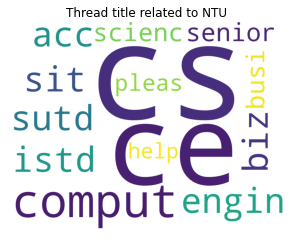

In [22]:
#Cloud word for titles that contain NTU, SMU IS
stop_words = stopwords.words('english')
stop_words.extend(['ntu', 'uni', 'smu', 'vs', 'level', 'levels'])

qn_content = ''
for line in df['title']:
    if 'ntu' in line.lower() and 'IS' in line and 'smu' in line.lower() and 'transfer' not in line.lower():
        qn_content += line.lower() + ' '    
        print(line)

# Tokenize Words
tokenizer = RegexpTokenizer(r'\w+')
words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words

# Remove stop words
words_filtered = []
for w in words_content:
    if w not in stop_words:
        words_filtered.append(w)

# Porter Stemmer
porter_stemmer = PorterStemmer()

words_stemmed = []
for w in words_filtered:
    words_stemmed.append(porter_stemmer.stem(w))

# WordCloud
words_joined = " ".join([w for w in words_stemmed])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                     width=1800,
                     height=1400).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Thread title related to NTU')
plt.show()

In [11]:
only_ntu = df[df['title'].str.contains('NTU')]
only_ntu.head()

,title,body,comments
2,[A levels] SMU IS vs SIT CS vs NTU CE vs SUTD ...,Hi I received my A lvl results this year and g...,"[SIT CS runs on a trimester system, it essenti..."
3,[UNI] should I transfer from NTU CS to SMU IS,"Abit of background , I am Y1S2 student studyin...",[I think you shud try to apply for SMU IS and ...
11,[A levels] NTU CS /NTU CE and SMU IS/SMU CS,So I got 75rp and can't go to NTU/SMU CS so I ...,[Go to NTU CE or SIT UOG if you really want to...
21,[uni] SMU IS or NTU Biz + Acc,hello so i’m having a hard time deciding betwe...,[>computing is something that i’m interested i...
27,[Uni] SMU IS or NTU Computer Engineering,I applied 2 years ago and chose to read comput...,[not a computing student but i also know CE an...


In [12]:
# original stopwords
def original_stopwords():
    return stopwords.words('english')

In [13]:
def extract_text(df):
    for(columnName, columnData) in df.iteritems():
        qn_content = []
        for line in df[columnName]:
            if len(line.strip()) > 0: # Eliminates empty answers
                qn_content.append(line)
    return qn_content

In [58]:
# Helper Function for Tokenisation of text content, returns a list of word or words depending on ngrams defined
import string

def token_fn(sentence_list, n, stop_words_custom):
    output = []
    output2 = []
    new_string = ''
    for line in sentence_list:
        #remove punctuations
        new_string = line.translate(str.maketrans('', '', string.punctuation))
        new_string = new_string.replace('“', '')
        new_string = new_string.replace('”', '')
        
        x = new_string.split()
        
        for word in x:
            if word not in stop_words_custom:
                #print(word)
                output.append(word)

        sentence = ""
        for word in output:
            sentence += word + " "
        
        token = word_tokenize(sentence)
        gram = list(ngrams(token, n))

        if n == 1:
            for content in gram:
                for word in content:
                    output2.append(word)  
        else:
            for content in gram:
                link = ''
                for word in content:
                    link += word + '_'
                link = link[:-1]
                output2.append(link)
    #print(output2)
    return output2

def wc_fn(word_list, title, no_word_max):
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', max_words = no_word_max, 
                             max_font_size = 1000,
                             width=3000,
                             height=2000).generate(words_joined)
    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

Hi I received my A lvl results this year and got 75rp, I've taken computing for O lvls and A lvls and enjoyed the practical aspect of it, so I'm looking for a computing related course in Uni.

I searched multiple sources online and came to this conclusion.

SMU IS -> Business(more than coding) + Computing (less technical and less coding, coding mostly front-end), only course out of these 4 that offers the business element. 

NTU CE -> Lots of math involved + hardware + more coding than SMU IS, very hard course

SUTD ISTD -> More coding than SMU IS, closer to a coding degree like CS? (I'm not exactly sure what's the difference btwn CS and ISTD)

SIT CS - > lots of coding(IoT), math involved but not as tough as CE math, dives deeper into the technicalities of coding(back-end), does it being primarily focused on IoT limit my career options compared to other CS degrees?

In terms of my priorities:

1. SIT CS/SMU IS/SUTD ISTD
2. NTU CE

Multiple sources online agreed that its better to pick

Sorry for the lengthy post and it may seem I'm contradicting and thinking too much but I really need advice >_< Can anyone give me some suggestions or which uni you went and why? Thankssss.
------------------
@seniors need you to share your expertise, got offered both need to make a decision

Straightforward question since smu is new and ntu is established, from your experience which school will provide better education to equip me with more skills and opportunities? 

Will smu be comparable to ntu? Is there a business focus for smu computer science?

Any students in any of the following courses that can share your experiences and maybe regrets and would have rather chosen another university for computer science?

Thank you
------------------
Hello once again!! It's the resident bored uni kid writing more articles for you guys. As business is consistently a very popular course of study, I have identified the various differences between the business schools in Singapore. Hope this helps

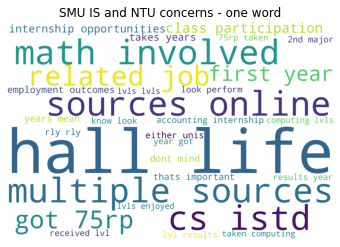

In [65]:
# # Top commmon body for SMU & NTU

smu_ntu_body = only_ntu.iloc[:, [1]]

sw = original_stopwords()
sw.extend(['ntu', 'business', 'computer', 'science','smu','exactly','ive','x200b' , 'boil','nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', "i'm", 'lol', 'bro', 'cmi', 
           'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right' , 'm' , 'i' , 'll' , 's', 't', 'don' , 'didn'])

sentences = []
for sentence in smu_ntu_body["body"]:
    #sentences = []
    if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower():
        sentences.append(sentence.lower())
        print(sentence)
        print('------------------')
        
    
single_word = token_fn(sentences, 1, sw)
wc_fn(single_word, 'SMU IS and NTU concerns - one word', 30)

# double_word = token_fn(sentences, 2, sw)
# wc_fn(double_word, 'SMU IS and NTU concerns - two words', 30)

# triple_word = token_fn(sentences, 3, sw)
# wc_fn(triple_word, 'SMU IS and NTU concerns - three words', 30)


# sw.extend(['nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', "i'm", 'lol', 'bro', 'cmi', 
#            'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right' , 'shed' , 'light' , 'able'])

# triple_word = token_fn(sentences, 3, sw)
# wc_fn(triple_word, 'SMU IS and NTU concerns - three words', 30)

In [72]:
# # # Top commmon body for SMU , NTU , BIZ , remove words

# smu_ntu_body = only_ntu.iloc[:, [1]]

# sentences = []
# for sentence in smu_ntu_body["body"]:
#     #sentences = []
#     if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower() and 'biz' in sentence.lower():
#         print(sentence)
#         sentences.append(sentence.lower())
#         print('--------------------------------')

# sw.extend(['shed', 'rlly', 'stressed','rly', 'look', 'know','light', 'able', 'ntu', 'vs','got', 'universities','two','heard','cs','nus', 'smu', 'comp', 'sci',
#            'exactly','x200b' , 'boil','nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', 
#            "i'm", 'lol', 'bro', 'cmi', 'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right'])

# single_word = token_fn(sentences, 1, sw)
# wc_fn(single_word, 'SMU CS and NTU concerns - one word', 30)

# double_word = token_fn(sentences, 2, sw)
# wc_fn(double_word, 'SMU CS and NTU concerns - two words', 30)

# triple_word = token_fn(sentences, 3, sw)
# wc_fn(triple_word, 'SMU CS and NTU concerns - three words', 30)